In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nn_module as NN

In [13]:
data, labels = NN.load_data('data_(10000_1000_2)/nonlin_data.npy')
SNR = 10

In [14]:
def corr_classifier(corr, seperation=0.5):
    """
    Classifies the values in a matrix of correlation values into 0 and 1 
    classes based on a separation threshold.

    Parameters
    ----------
    corr : numpy.ndarray
        A matrix of correlation values.
    seperation : float, optional
        The separation threshold used to determine which values in `corr` 
        should be classified as 0 and which should be classified as 1. 
        The default value is 0.5.

    Returns
    -------
    numpy.ndarray
        A matrix of predicted classes, with 0 for values that fall below 
        the separation threshold and 1 for values that are above it.
    """
    classifier0_idx = np.where((corr<seperation) & (corr>-seperation))

    pred = np.ones(corr.shape)
    pred[classifier0_idx] = 0

    return pred


In [15]:
data = NN.add_noise(data, SNR) # adding noise

In [16]:
corr = np.zeros(len(data))

for i in range(len(data)):
    corr[i] = np.corrcoef(data[i,:,0], data[i,:,1])[0,1]

pred = corr_classifier(corr, 0.5)


acc = np.count_nonzero(pred == labels)/len(labels)
acc0 = (len(pred[np.where(labels==0)])-
        np.sum(pred[np.where(labels==0)]))/len(np.where(labels==0)[0])
        
acc1 = np.sum(pred[np.where(labels==1)])/len(np.where(labels==1)[0])
print(f"{acc*100:.5f}% overall accuracy")
print(f"{acc0*100:.5f}% of 0 guessed correctly")
print(f"{acc1*100:.5f}% of 1 guessed correctly")

path = f"non_lin_plots/snr{SNR}/"
with open(path+"corr_accuracies.txt", "w") as f:
    # Use the write() method of the file object to append text to the file
    f.write(f"{acc*100:.5f}% overall accuracy\n")
    f.write(f"{acc0*100:.5f}% of 0 guessed correctly\n")
    f.write(f"{acc1*100:.5f}% of 1 guessed correctly")

66.09000% overall accuracy
98.26000% of 0 guessed correctly
33.92000% of 1 guessed correctly


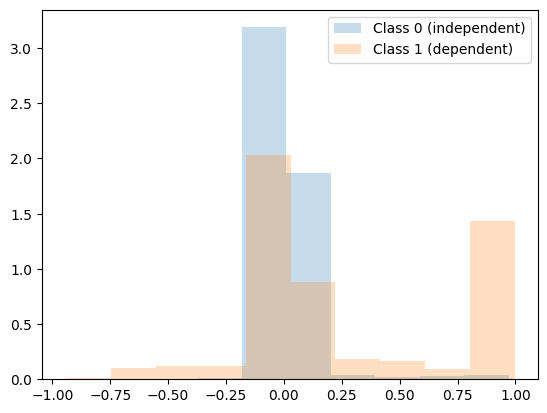

In [17]:
x_axis = np.linspace(0, len(data), len(data))

dependent = corr[np.where(labels==1)]
independent = corr[np.where(labels==0)]

half = len(data)//2

# plt.plot(x_axis[:half], independent, '*', alpha=0.25, label='class 0, independent')
# plt.plot(x_axis[half:], dependent, '*', alpha=0.25, label='class 1, dependent')
# plt.legend()
# plt.show()
plt.hist(independent, alpha=0.25, label='Class 0 (independent)', density=True)
plt.hist(dependent, alpha=0.25, label='Class 1 (dependent)', density=True)
plt.legend()
plt.savefig(path+'corr_classification_distribution')
plt.show()

# plt.hist(corr_classifier(independent), alpha=0.25, label='Class 0 (independent)', density=True)
# plt.hist(corr_classifier(dependent), alpha=0.25, label='Class 1 (dependent)', density=True)
# plt.legend()
# plt.show()

In [28]:
snr_list = [10, 50, 100]
acc_corr = np.zeros((3,3))
acc_nn = np.zeros((3,3))
for i, item in enumerate(snr_list):
    acc_corr[i] = np.loadtxt(path[:14]+f'snr{item}'+'/corr_accuracies.txt', delimiter='%', usecols=[0])
    acc_nn[i] = np.loadtxt(path[:14]+f'snr{item}'+'/nn_accuracies.txt', delimiter='%', usecols=[0])

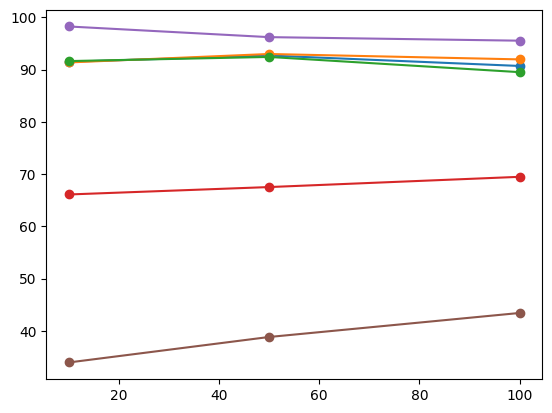

In [37]:
plt.plot(snr_list, acc_nn[:,0],'-o')
plt.plot(snr_list, acc_nn[:,1],'-o')
plt.plot(snr_list, acc_nn[:,2],'-o')
plt.plot(snr_list, acc_corr[:,0],'-o')
plt.plot(snr_list, acc_corr[:,1],'-o')
plt.plot(snr_list, acc_corr[:,2],'-o')
plt.show()


In [38]:
snr_list = [10, 50, 100]
acc_corr = np.zeros((3,3), dtype='object')
acc_nn = np.zeros((3,3), dtype='object')
for i, item in enumerate(snr_list):
    acc_corr[i] = np.loadtxt(path[:14]+f'snr{item}'+'/corr_accuracies.txt', dtype='object', usecols=[0])
    acc_nn[i] = np.loadtxt(path[:14]+f'snr{item}'+'/nn_accuracies.txt', dtype='object', usecols=[0])

In [49]:
table = ''
l5 = ['Overall accuracy', 'Accuracy class 0', 'Accuracy class 1']
for i, l in enumerate(acc_nn.T):
    for j, percent in enumerate(l):
        if j == 0:
            table += '\multicolumn{1}{l|}{'+l5[i]+'}' + ' & '
        if j != 2:
            table += percent + ' & '
        else:
            table += percent + ' \\'
    

table

'\\multicolumn{1}{l|}{Overall accuracy} & 91.50000% & 92.70000% & 90.70000% \\\\multicolumn{1}{l|}{Accuracy class 0} & 91.37255% & 92.98969% & 91.95876% \\\\multicolumn{1}{l|}{Accuracy class 1} & 91.63265% & 92.42718% & 89.51456% \\'

In [50]:
acc_nn

array([['91.50000%', '91.37255%', '91.63265%'],
       ['92.70000%', '92.98969%', '92.42718%'],
       ['90.70000%', '91.95876%', '89.51456%']], dtype=object)